In [1]:
import pandas as pd
import numpy as np
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Running data investigation for checking the data

In [5]:
# Descriptive Statistics
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [6]:
# Data type of the columns
df.dtypes 

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [7]:
# Understanding range of the data in the dataframe
pd.concat([df.min(),df.max()],axis = 1)

,0,1
StudentID,1001.000000,3392.000000
Age,15.000000,18.000000
Gender,0.000000,1.000000
Ethnicity,0.000000,3.000000
ParentalEducation,0.000000,4.000000
StudyTimeWeekly,0.001057,19.978094
Absences,0.000000,29.000000
Tutoring,0.000000,1.000000
ParentalSupport,0.000000,4.000000
Extracurricular,0.000000,1.000000


**(for next time, this min max thing is done in the step of descriptive)**

In [8]:
# Check for null values
df.notnull().sum()

StudentID            2392
Age                  2392
Gender               2392
Ethnicity            2392
ParentalEducation    2392
StudyTimeWeekly      2392
Absences             2392
Tutoring             2392
ParentalSupport      2392
Extracurricular      2392
Sports               2392
Music                2392
Volunteering         2392
GPA                  2392
GradeClass           2392
dtype: int64

## Do _Absences_ influence the GPA of a student?

In [5]:
df = pd.read_csv("/drive/data/Student_performance_data.csv")
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [7]:
# Creating quartile classes based on .describe()
absence_conditions = {'absences_min': list(df.Absences >=0)
                      ,'absences_25': list(df.Absences >=7)
                      ,'absences_50':list(df.Absences >= 15)
                      ,'absences_75':list(df.Absences >= 22)
                      ,'absences_max':list(df.Absences >= 29)
                     }

In [8]:
absence_condtions_df = pd.DataFrame(absence_conditions)

In [9]:
absence_quartile = absence_condtions_df.sum(axis=1)-1

In [10]:
df['absence_quartile']=absence_quartile

**Below**

Students who miss classes more frequently perform less than students missing classes less frequently.

Although we cannot determine which one between GPA and Absence is truly the independent variable (low GPA students might not show up to classes because they don't se an advantage in learning more, and viceversa), our assumption is to take absences as an independent variable as it's the one in control of the student's behavior. In simple terms, before missing another class, the student is not aware of his/her GPA.

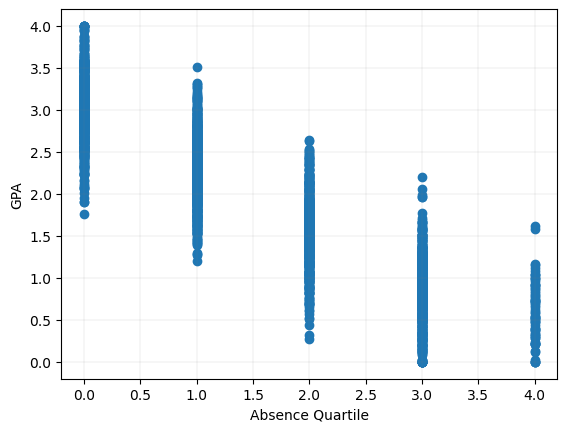

In [11]:
plt.scatter(df.absence_quartile,df.GPA)
plt.grid(which='both',color='grey',linewidth = 0.1)
plt.xlabel('Absence Quartile')
plt.ylabel('GPA')
plt.show()

**Can we see any pattern between absences and weekly studying time in relation to the GPA?**

For low quartiles of absences, students register low level of GPAs (as proven in the chart above).

Combining this information to the weekly studying time, it's clear that the more students study, less they are absent and more they turn performing.

**Therefore, Student's performance (measured in GPA) can be seen as a function of absences and weekly studying time.**
The more the students participate to lessons, and proactively interact with exercises and homework, the more their performance are overall.

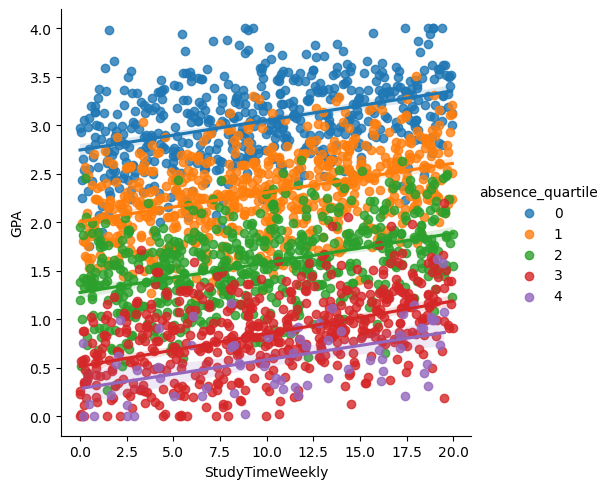

In [12]:
sns.lmplot(data=df, x='StudyTimeWeekly', y='GPA', hue='absence_quartile')
plt.show()

## Estimate the GPA of a student by Weekly Studying Hours, Absences, Tutoring, and Parental Support

In [13]:
# selecting independent and dependent variables
x_columns = df[df.columns[5:9]]
x_var = np.array(x_columns)
y_var = df[['GPA']]

x_columns, y_var

(      StudyTimeWeekly  Absences  Tutoring  ParentalSupport
 0           19.833723         7         1                2
 1           15.408756         0         0                1
 2            4.210570        26         0                2
 3           10.028829        14         0                3
 4            4.672495        17         1                3
 ...               ...       ...       ...              ...
 2387        10.680555         2         0                4
 2388         7.583217         4         1                4
 2389         6.805500        20         0                2
 2390        12.416653        17         0                2
 2391        17.819907        13         0                2
 
 [2392 rows x 4 columns],
            GPA
 0     2.929196
 1     3.042915
 2     0.112602
 3     2.054218
 4     1.288061
 ...        ...
 2387  3.455509
 2388  3.279150
 2389  1.142333
 2390  1.803297
 2391  2.140014
 
 [2392 rows x 1 columns])

In [14]:
# Splitting X, Y in train and test

x_train, x_test, y_train, y_test = train_test_split(x_var,y_var,random_state = 104, test_size = 0.30, shuffle = True)

In [15]:
# Standardization of the variables
sc = StandardScaler()

# Training Data
x_train_std = sc.fit_transform(x_train)
y_train_std = sc.fit_transform(y_train)

# Testing Data
x_test_std = sc.fit_transform(x_test)
y_test_std = sc.fit_transform(y_test)


In [16]:
# Applying Linear Regression model to the training data
model = LinearRegression()
model.fit(x_train_std,y_train_std)

# Extracting values of coefficients per variable
model_coeffs = model.coef_[0]
variables = ['Weekly studying time', 'Absences', 'Tutoring', 'Parental Support']

# Printing the R-Squared
print(f"R-Squared is: {model.score(x_train_std,y_train_std)}")

# iteration with the two lists to assign variable to model coeff
for coeff in range(0,4):
    print(f"{coeff+1}) Coefficient of {variables[coeff]} is {round(model_coeffs[coeff],3)}")

# Printing the model intercept
print(f"Intecept (when coefficients = 0): {float(round(model.intercept_[0]))}")

# Printing MAE
print(f"Mean Absolute Error is: {round(mean_absolute_error(y_train_std,model.predict(x_train_std)),3)}")

R-Squared is: 0.931240681125953
1) Coefficient of Weekly studying time is 0.173
2) Coefficient of Absences is -0.921
3) Coefficient of Tutoring is 0.124
4) Coefficient of Parental Support is 0.182
Intecept (when coefficients = 0): 0.0
Mean Absolute Error is: 0.21


In [17]:
# Applying Linear Regression model to the testing data
model = LinearRegression()
model.fit(x_test_std,y_test_std)

# Extracting values of coefficients per variable
model_coeffs = model.coef_[0]
variables = ['Weekly studying time', 'Absences', 'Tutoring', 'Parental Support']

# Printing the R-Squared
print(f"R-Squared is: {model.score(x_test_std,y_test_std)}")

# iteration with the two lists to assign variable to model coeff
for coeff in range(0,4):
    print(f"{coeff+1}) Coefficient of {variables[coeff]} is {round(model_coeffs[coeff],3)}")

# Printing the model intercept
print(f"Intecept (when coefficients = 0): {float(round(model.intercept_[0]))}")

# Printing MAE
print(f"Mean Absolute Error is: {round(mean_absolute_error(y_test_std,model.predict(x_test_std)),3)}")

R-Squared is: 0.9302420230285193
1) Coefficient of Weekly studying time is 0.187
2) Coefficient of Absences is -0.916
3) Coefficient of Tutoring is 0.13
4) Coefficient of Parental Support is 0.197
Intecept (when coefficients = 0): 0.0
Mean Absolute Error is: 0.211


### Conclusion

Our Multilinear Regression Model **fits quite well to our points** given its 0.93 R-Squared.

The highest impact to the Student's performance (measured in GPA) is coming from **Absences, negatively impact the performances**.

**Weekly Studying Time, Tutoring, and Parental Support positively affects the performance** of one student, but with smaller impact.

**DISCLAIMER**: The model can have an error prediction of appx. +/- 0.211 GPA. Considering the distribution STD. DEV of 0.92 this error can be considered acceptable.